# Sales Analysis

#### Import Necessary Libraries

In [21]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Merging 12 months of data into a single file

In [2]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data") if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("./SalesAnalysis/Output/all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("./SalesAnalysis/Output/all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Augment the dataframe with some columns e.g. month

#### Task 2: Add month column

#### Clean up the data

##### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
# all_data.head()

all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert columns to the correct types

#### Task 3: Need to add a sales column

In [6]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [7]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Need to add a city column

In [10]:
"""
    Alternative using regular expression grouping
    df_address = all_data[re.match(r"(.+), (.+), (.+)", all_data["Purchase Address"].to_string())]
"""

# Use the .apply() method
address_column = all_data["Purchase Address"]

def get_city(address):
    return address.split(",")[1]

def get_state_code_with_postal_code(address):
    return address.split(",")[2]

def get_state_code(address):
    return address.split(",")[2][0:3]

def get_city_with_state_code(address):
    return f"{get_city(address)} ({get_state_code(address)})"

all_data["City"] = address_column.apply(lambda x: get_city(x))

all_data["City_n_State_Code"] = address_column.apply(lambda x: get_city_with_state_code(x))

all_data["State_Code"] = address_column.apply(lambda x: get_state_code(x))

all_data["State_n_Postal_Code"] = address_column.apply(lambda x: get_state_code_with_postal_code(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State_Code,State_Code,State_n_Postal_Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas ( TX),TX,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston ( MA),MA,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles ( CA),CA,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001


#### Task 5a: Convert "Order Date" to datetime format in another "Order_Datetime" column

In [11]:
all_data["Order_Datetime"] = pd.to_datetime(all_data["Order Date"])

all_data.head()

/tmp/ipykernel_67894/4093036062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order_Datetime"] = pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State_Code,State_Code,State_n_Postal_Code,Order_Datetime
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas ( TX),TX,TX 75001,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston ( MA),MA,MA 02215,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-30 09:27:00


#### Task 5b: Create necessary columns from the "Order_Datetime" column

In [12]:
all_data["Hour"] = all_data["Order_Datetime"].dt.hour
all_data["Minute"] = all_data["Order_Datetime"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State_Code,State_Code,State_n_Postal_Code,Order_Datetime,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas ( TX),TX,TX 75001,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston ( MA),MA,MA 02215,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles ( CA),CA,CA 90001,2019-04-30 09:27:00,9,27


#### Question 1: What was the best month for sales? How much was earned in that month?

In [14]:
sales_by_month = all_data.groupby("Month").sum()["Sales"]

sales_by_month

TypeError: datetime64 type does not support sum operations

##### Answer: The best month is December with sales of 4_613_443.34

In [15]:
months = range(1, 13)

plt.bar(months, sales_by_month)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.xticks(months)
plt.show()

NameError: name 'sales_by_month' is not defined

#### Question 2: What US city had the highest number of sales?

In [16]:
sales_by_city = all_data.groupby("City_n_State_Code").sum()["Sales"]

sales_by_city

TypeError: datetime64 type does not support sum operations

In [ ]:
cities = [city for city, df in all_data.groupby("City_n_State_Code")]

plt.bar(cities, sales_by_city)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.xticks(cities, rotation="vertical", size=8)
plt.show()

##### Answer: San Francisco (CA).

#### Question 3: What time should we display advertisements to maximise the likelihood of customers buying the product?

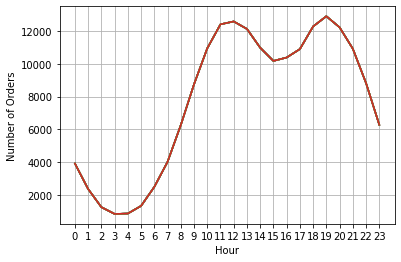

In [17]:
hours = [hour for hour, df in all_data.groupby("Hour")]
# minutes = [minute for minute, df in all_data.groupby("Minute")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

##### Answer: Recommendation is around 11 a.m. (11) and 7 p.m. (19)

#### Question 4: What products are most often sold together?

In [20]:
multi_order_df = all_data[all_data["Order ID"].duplicated(keep=False)]

multi_order_df["Grouped_Orders"] = multi_order_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

multi_order_df = multi_order_df[["Order ID", "Grouped_Orders"]].drop_duplicates()

multi_order_df

/tmp/ipykernel_67894/3144160061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_order_df["Grouped_Orders"] = multi_order_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped_Orders
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186627,150287,"iPhone,Lightning Charging Cable"
186644,150303,"iPhone,Lightning Charging Cable"
186665,150323,"Google Phone,USB-C Charging Cable,Apple Airpod..."
186679,150335,"iPhone,Apple Airpods Headphones"


In [42]:
count_items = Counter()

""" count_2_items = Counter()
count_3_items = Counter()

for row in multi_order_df["Grouped_Orders"]:
    row_list = row.split(",")
    count_2_items.update(Counter(combinations(row_list, 2)))
    count_3_items.update(Counter(combinations(row_list, 3)))

for key, value in count_2_items.most_common():
    print(key, value)

for key, value in count_3_items.most_common():
    print(key, value)
"""
def show_grouped_orders(num_items_bought_together_to_count):
    count_items = Counter()
    try:
        num_items = int(num_items_bought_together_to_count)

        if num_items < 2:
            raise ValueError("Number of items must be 2 or greater.")
    except:
        raise ValueError("Whole number must be given.")

    for row in multi_order_df["Grouped_Orders"]:
        row_list = row.split(",")
        count_items.update(Counter(combinations(row_list, num_items)))

    for key, value in count_items.most_common():
        print(key, value)

show_grouped_orders(5)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


##### Answer:
- 2 products combo -> ('iPhone', 'Lightning Charging Cable') 1005
- 3 products combo -> ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
- 4 products combo -> ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
- 5 products combo -> ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1